Suppose that we have four observations, for which we compute a
dissimilarity matrix, given by


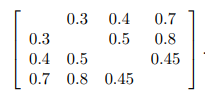

For instance, the dissimilarity between the first and second observations is 0.3, and the dissimilarity between the second and fourth
observations is 0.8.

(a)On the basis of this dissimilarity matrix, sketch the dendrogram
that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the
height at which each fusion occurs, as well as the observations
corresponding to each leaf in the dendrogram.

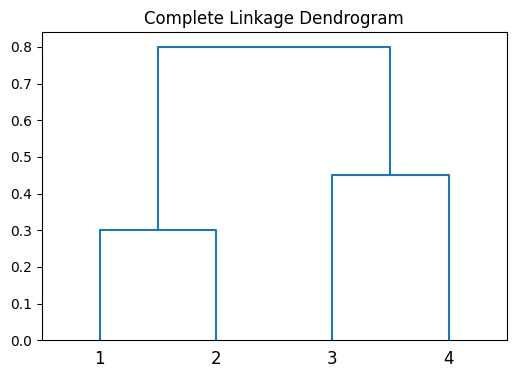

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

# dissimilarity matrix
D = np.array([
    [0.0, 0.3, 0.4, 0.7],
    [0.3, 0.0, 0.5, 0.8],
    [0.4, 0.5, 0.0, 0.45],
    [0.7, 0.8, 0.45, 0.0]
])

# SciPy linkage requires compressed vectors (upper triangular)
from scipy.spatial.distance import squareform
condensed_D = squareform(D)

# (a) Complete linkage dendrogram
Z_complete = linkage(condensed_D, method='complete')
fig, ax = plt.subplots(figsize=(6,4))
dendrogram(Z_complete, labels=[1,2,3,4], ax=ax, color_threshold=-np.inf)
ax.set_title("Complete Linkage Dendrogram")
plt.show()

* (1,2) merged at 0.3
* (1,2,3) merged at 0.5
* All merged at 0.8

(b) Repeat (a), this time using single linkage clustering

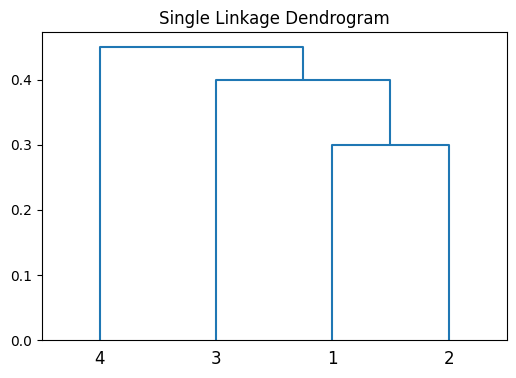

In [ ]:
# (b) Single linkage dendrogram
Z_single = linkage(condensed_D, method='single')
fig, ax = plt.subplots(figsize=(6,4))
dendrogram(Z_single, labels=[1,2,3,4], ax=ax, color_threshold=-np.inf)
ax.set_title("Single Linkage Dendrogram")
plt.show()

* (1,2) at 0.3
* (1,2,3) at 0.4
* All at 0.45

(c) Suppose that we cut the dendrogram obtained in (a) such that
two clusters result. Which observations are in each cluster?


In [ ]:
# (c) Cut complete linkage dendrogram into 2 clusters
clusters_complete = cut_tree(Z_complete, n_clusters=2).flatten()
print("(c) Complete linkage, 2 clusters:", clusters_complete)

(c) Complete linkage, 2 clusters: [0 0 1 1]


* (1)[0]
* (2)[0]
* (3)[1]
* (4)[1]

(d) Suppose that we cut the dendrogram obtained in (b) such that
two clusters result. Which observations are in each cluster?

In [ ]:
# (d) Cut single linkage dendrogram into 2 clusters
clusters_single = cut_tree(Z_single, n_clusters=2).flatten()
print("(d) Single linkage, 2 clusters:", clusters_single)

(d) Single linkage, 2 clusters: [0 0 0 1]


* (1)[0]
* (2)[0]
* (3)[0]
* (4)[1]

(e) It is mentioned in this chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be
swapped without changing the meaning of the dendrogram. Draw
a dendrogram that is equivalent to the dendrogram in (a), for
which two or more of the leaves are repositioned, but for which
the meaning of the dendrogram is the same.

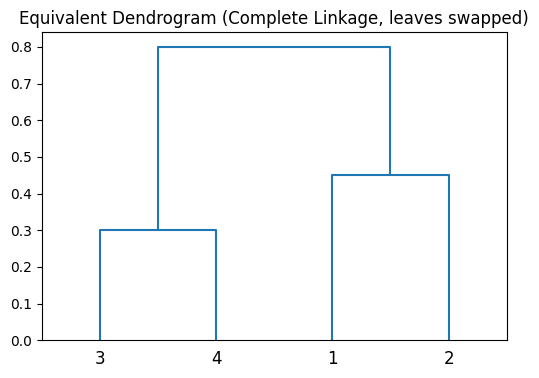

In [ ]:
# (e) Equivalent dendrogram: swap leaves
fig, ax = plt.subplots(figsize=(6,4))
# Rearrangement can be achieved by leaf_rotation or labels sorting
dendrogram(Z_complete, labels=[3,4,1,2], ax=ax, color_threshold=-np.inf)
ax.set_title("Equivalent Dendrogram (Complete Linkage, leaves swapped)")
plt.show()